### Name: Shilpa Gopalakrishnaiah

# Regression Task

# Table of contents

[PART A](#parta) <br>

1. [EDA](#eda)<br>
2. [Pre-Processing](#pp)<br>
3. [Dimentionality Reduction - PCA](#pca)<br>
4. [Util Methods](#util)<br>
5. [Modelling](#modelling)<br>
     - [Algo1 - Linear Regression](#LR)<br>
     - [Algo2 - Stochastic Gradient Descent](#sgd)<br>
     - [Algo3 - Multi Layer Perceptron](#mlp)]<br>
6. [Conclusion](#conclusion)<br>

[PART B](#partb) <br>

[Miscellaneous (Other algorithms tried)](#misc)<br>

# Brief on the work:

**Brief Introduction**:
  - Regression task on provided dataset
  - Performed EDA, Preprocessing, dimention reduction
  - Modellign 3 algorithms tried - Linear regression, SGD, Multi Layer Perceptron

**Brief Result Summary**:
- Best Model - MLP
- Future scope for improvement by functional understanding and outlier treatment
    

#### About Dataset:

- 35 Independent variables, 1 integer dependent variable
- No null, but 2 independent variables are categorical, needs encoding
- 1500 records
- Regression problem

# Part A<a class="anchor" id="parta"></a>

In [ ]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

In [501]:
#Imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.utils import resample

from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,  average_precision_score,plot_roc_curve,auc
from sklearn.metrics import classification_report,plot_confusion_matrix, confusion_matrix,f1_score

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold,StratifiedKFold

from IPython.display import display

from joblib import dump, load
import time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn import linear_model

from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')

get_ipython().run_line_magic('matplotlib', 'inline')

### Import data from CSV

In [502]:
df = pd.read_csv('P2_Data.csv')
df.head(2)

F1                    F2                 F3  \
0  854.03999999999996 -15267.84000000000015 193.03999999999999   
1 1748.75999999999999  -4299.44999999999982 439.72000000000003   

                    F4                 F5                 F6  \
0 12132.20000000000073 464.22000000000003 -19.81000000000000   
1 18046.13999999999942 540.36000000000001  -8.55000000000000   

                   F7                F8                 F9               F10  \
0  920.41999999999996 11.84000000000000 -38.02000000000000  8.35000000000000   
1 1913.77999999999997 11.28000000000000 122.02000000000000 -8.83000000000000   

   ...                 F28                  F29  F30                F31  \
0  ... -100.43000000000001 10497.31999999999971    8 -46.22000000000000   
1  ...  -97.41000000000000 16792.88000000000102    4  51.24000000000000   

                  F32                F33                  F34  \
0   91.89000000000000 -41.70000000000000  -849.77999999999997   
1 -450.33999999999997 -75.30000000000000 -1801.58999999999992   

                F35                 F36             Target  
0 -5.12000000000000 4261.68000000000029 609.09000000000003  
1 -0.16000000000000 2737.57999999999993 232.66000000000000  

[2 rows x 37 columns]

<div class="alert alert-warning">
    
# 1.EDA<a class="anchor" id="eda"></a>

### 1.1 Statistics

In [503]:
df.describe()

F1                    F2                   F3  \
count  1500.00000000000000   1500.00000000000000  1500.00000000000000   
mean    847.01151999999877 -11736.90860000000612  -236.07649999999995   
std     595.11553301241008   9055.63390744068784   299.25617360868569   
min   -1271.53999999999996 -43559.91000000000349 -1466.29999999999995   
25%     441.43500000000000 -17835.66750000000320  -430.19000000000000   
50%     858.35000000000002 -11634.23999999999978  -236.73500000000001   
75%    1249.02500000000009  -5991.98999999999978   -40.25000000000000   
max    2769.65999999999985  22545.33000000000175   789.33000000000004   

                        F4                  F5                  F6  \
count  1500.00000000000000 1500.00000000000000 1500.00000000000000   
mean  24903.09554666669283  569.65424000000075  -13.88179333333336   
std    5930.19940385741120  129.85699637920229    4.22779465944249   
min    4409.77999999999975   24.18000000000000  -35.66000000000000   
25%   20806.39500000000044  501.30000000000001  -15.88750000000000   
50%   25064.16999999999825  567.70499999999993  -13.90500000000000   
75%   28904.09999999999854  633.56999999999994  -11.83500000000000   
max   47069.09999999999854 1194.48000000000002   12.23000000000000   

                       F7                  F8                  F9  \
count 1500.00000000000000 1500.00000000000000 1500.00000000000000   
mean  1701.12737333333143   10.15417999999998  -15.80987999999999   
std    591.28400057151509    4.21493548962747   82.21558771604444   
min     34.98000000000000   -8.26000000000000 -398.68000000000001   
25%   1297.58999999999992    8.05000000000000  -57.01500000000000   
50%   1716.70000000000005   10.18000000000000  -16.33000000000000   
75%   2095.69499999999971   12.15500000000000   25.97000000000000   
max   3640.98000000000002   27.75000000000000  331.62000000000000   

                      F10  ...                 F28                  F29  \
count 1500.00000000000000  ... 1500.00000000000000  1500.00000000000000   
mean   -55.08467333333338  ... -116.32178666666654  7402.94986666667501   
std     29.89570621555389  ...   41.15529522460636  5949.55473245257326   
min   -152.81000000000000  ... -310.51999999999998 -9729.68000000000029   
25%    -75.01250000000000  ... -137.11500000000001  3548.70499999999993   
50%    -55.55000000000000  ... -116.61000000000000  7472.75000000000000   
75%    -35.19000000000000  ...  -96.09999999999999 11456.31999999999971   
max     53.45000000000000  ...   95.31000000000000 28498.43999999999869   

                      F30                 F31                  F32  \
count 1500.00000000000000 1500.00000000000000  1500.00000000000000   
mean     7.95466666666667  -12.84756000000002  -397.26534666666589   
std      3.51162344531749   44.36075677300883   433.26439107847051   
min      0.00000000000000 -271.94999999999999 -2440.88000000000011   
25%      6.00000000000000  -33.35750000000000  -618.37000000000000   
50%      8.00000000000000  -13.58500000000000  -388.21000000000004   
75%     10.00000000000000    8.72750000000000  -182.06500000000000   
max     22.00000000000000  192.91999999999999  1832.76999999999998   

                      F33                  F34                 F35  \
count 1500.00000000000000  1500.00000000000000 1500.00000000000000   
mean   -57.93882000000000 -1636.51509999999962    5.44489333333333   
std     12.47538879920759   921.61160953868171    5.96959731612611   
min   -112.02000000000000 -4215.09000000000015  -17.04000000000000   
25%    -64.65000000000001 -2263.79250000000002    1.59500000000000   
50%    -58.26000000000000 -1655.11500000000001    5.39000000000000   
75%    -51.39000000000000 -1013.64749999999992    9.58500000000000   
max     15.81000000000000  1111.38000000000011   22.96000000000000   

                       F36               Target  
count  1500.00000000000000  1500.00000000000000  
mean   3598.85454666666419   856.49354666666591  
std     845.7545918454202

### **Analysis** - of data types
- 2 columns are of type string - F20, F27

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   int64  
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   object 
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

### 1.2 Missing data analysis

**Analysis** 
- No Missing data

In [8]:
df.isnull().values.any()

False

### 1.3 Correlation pair plot in the dataset

**Analysis**
- Plot F1 vs Target - Does not look like any linear correlation

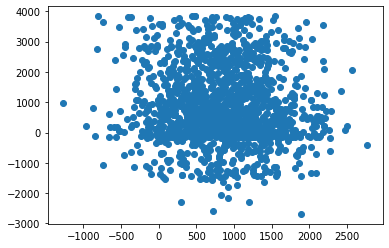

In [440]:
plt.scatter((df[["F1"]]), (df[["Target"]]))

**Analysis**
- Plot with transformation by applying log F1 vs Target - Still does not look like there is any linear correlation

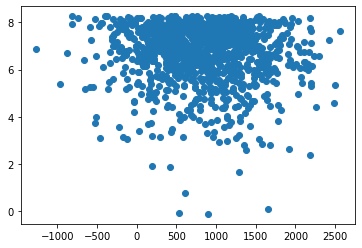

In [171]:
plt.scatter((df[["F1"]]), np.log(df[["Target"]]))

### Print pair plot
**Analysis** - No linear correlation, all datapoints look scattered, suitable for non-linear modelling

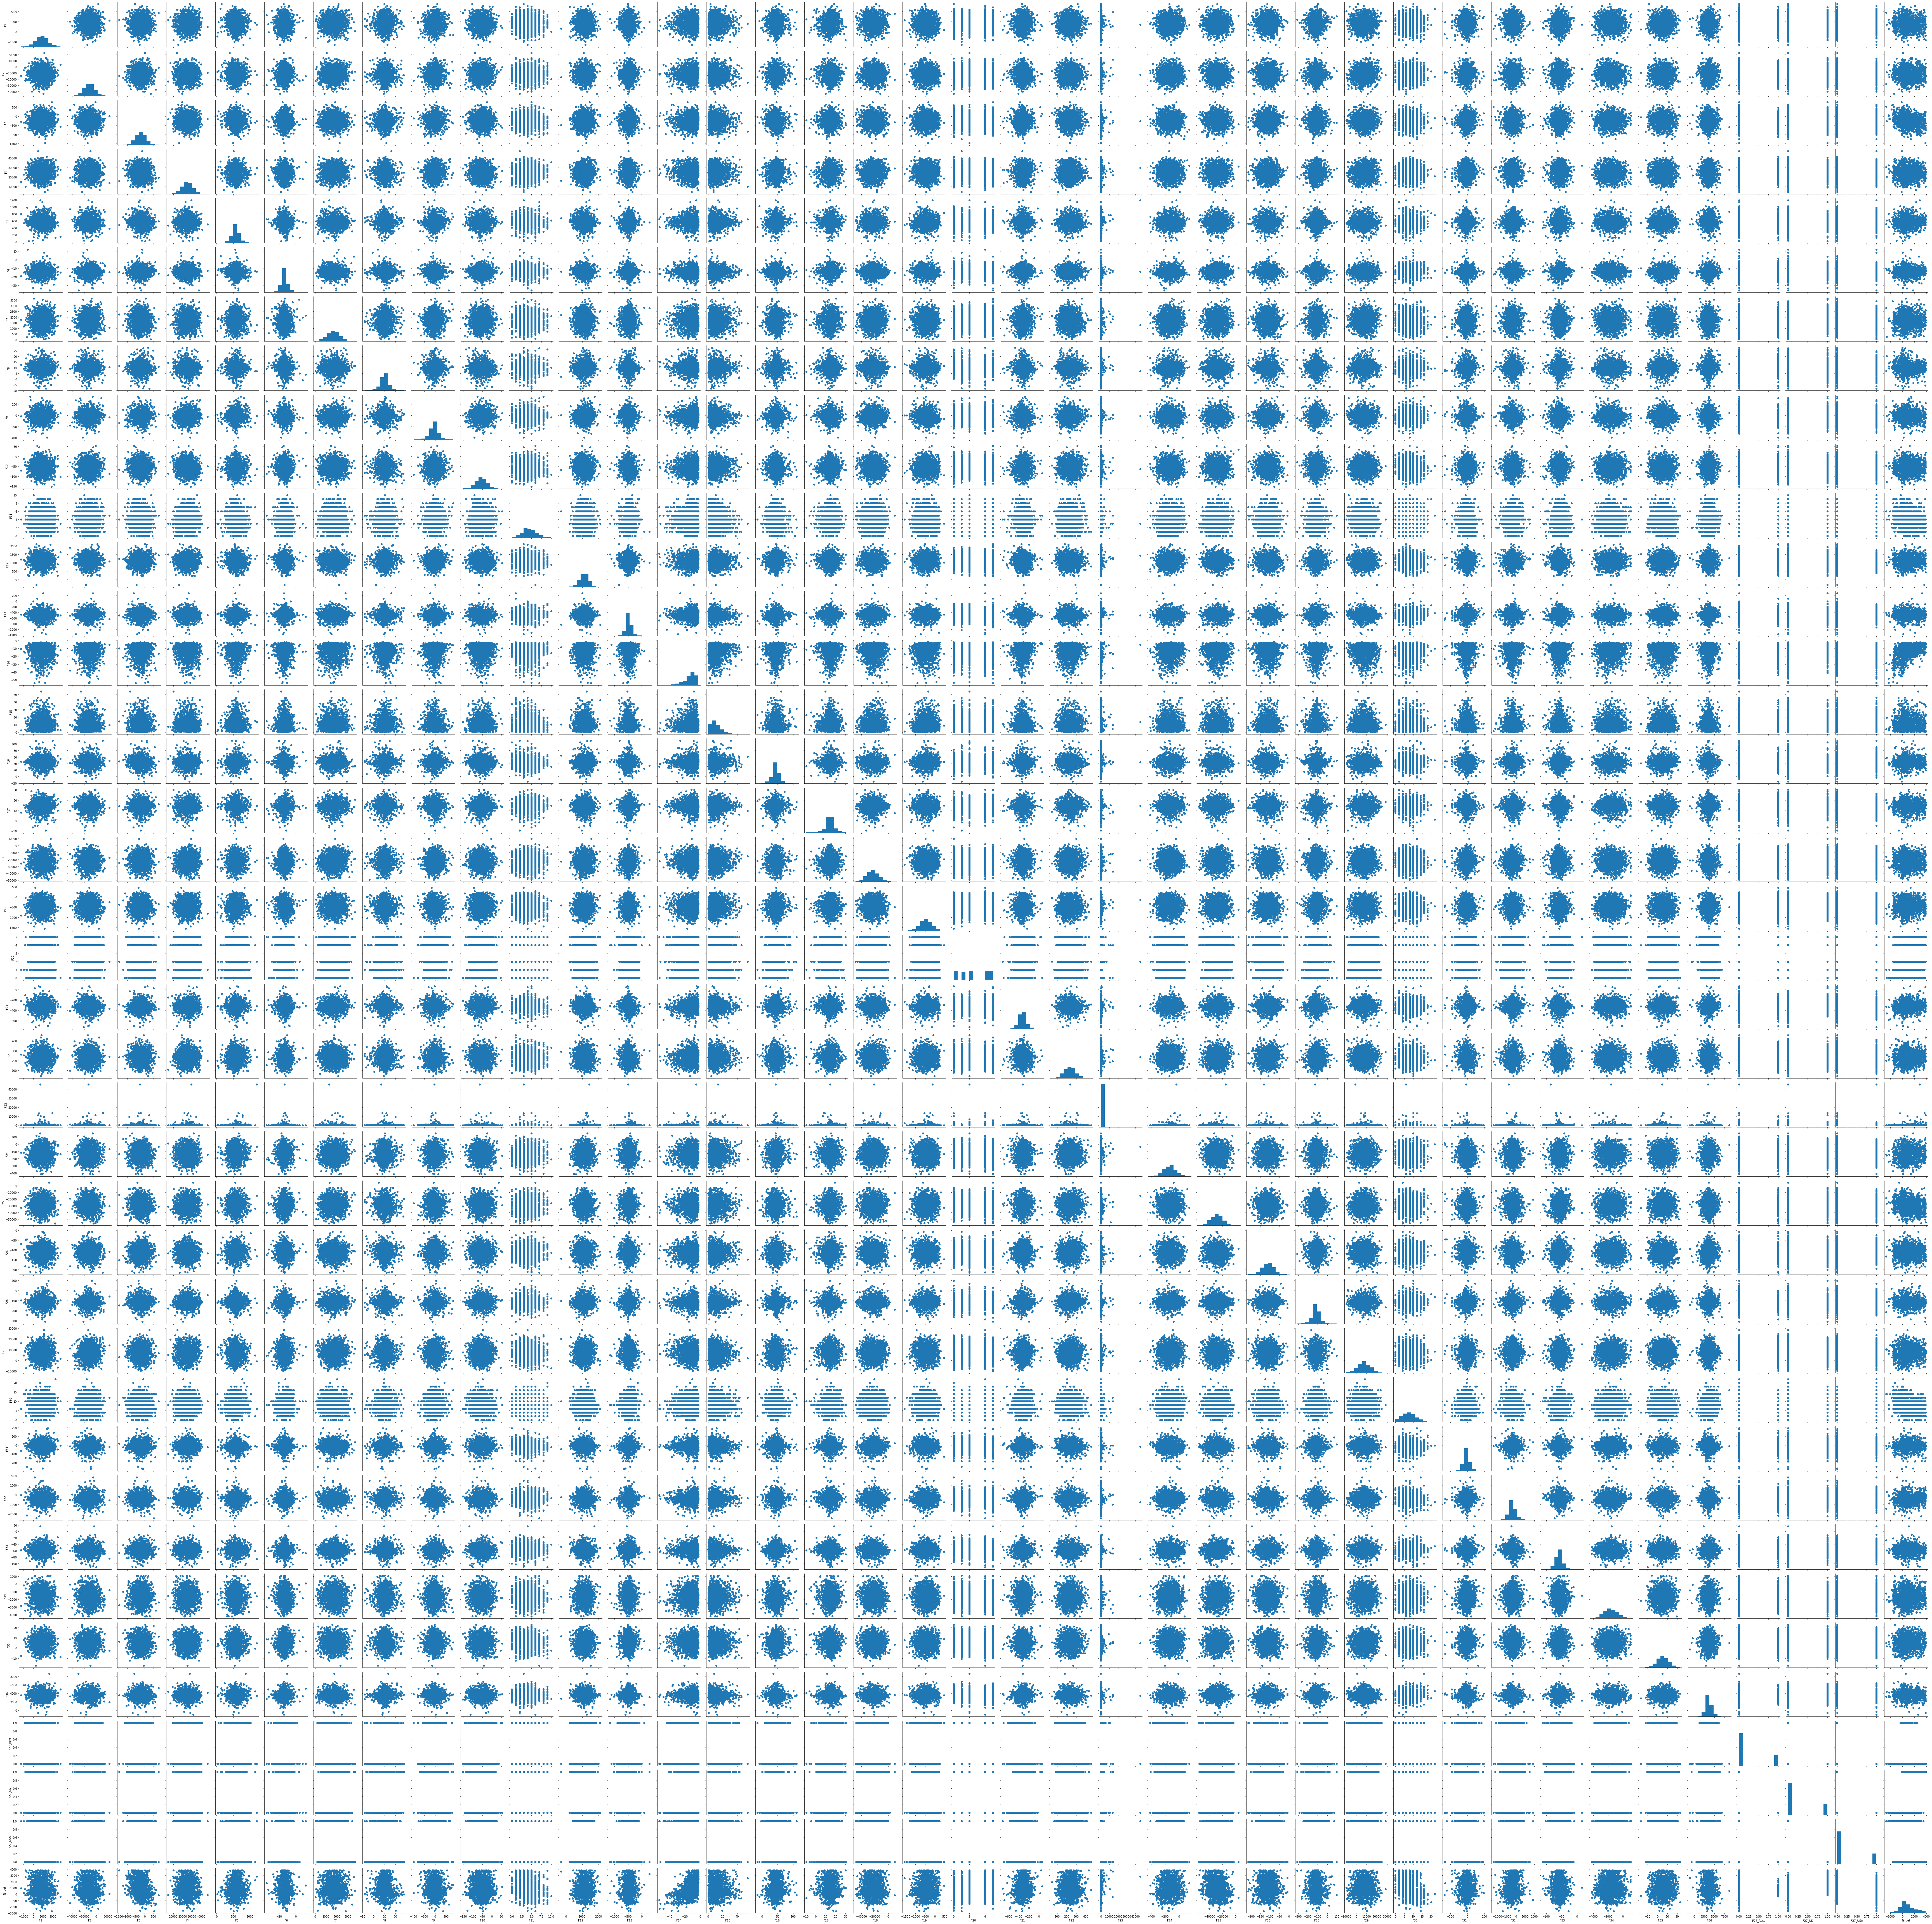

In [128]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

### 1.4 Distribution

**Analysis**
- Most of the columns/Data are normally distributed

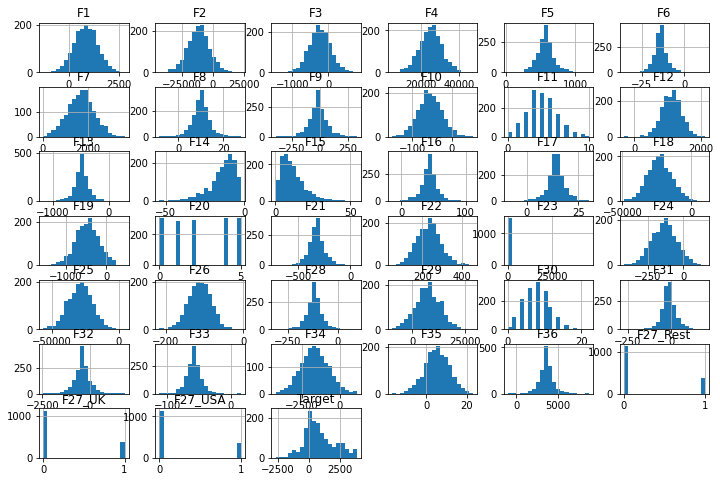

In [129]:
df.hist(figsize=(12,8),bins=20)
plt.show()

### 1.5 Correlation Matrix

### **Analysis**
- No strong positive or negative correlation
- No Multicollinearity
- F14 has the max correlation with the Target of 0.46

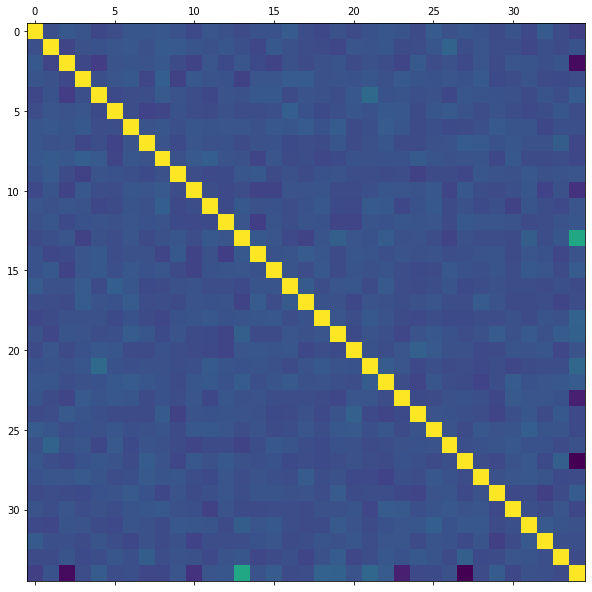

In [10]:
corr = df.corr() 

# Plot heatmap of correlation
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(),fignum=f.number)
plt.show()

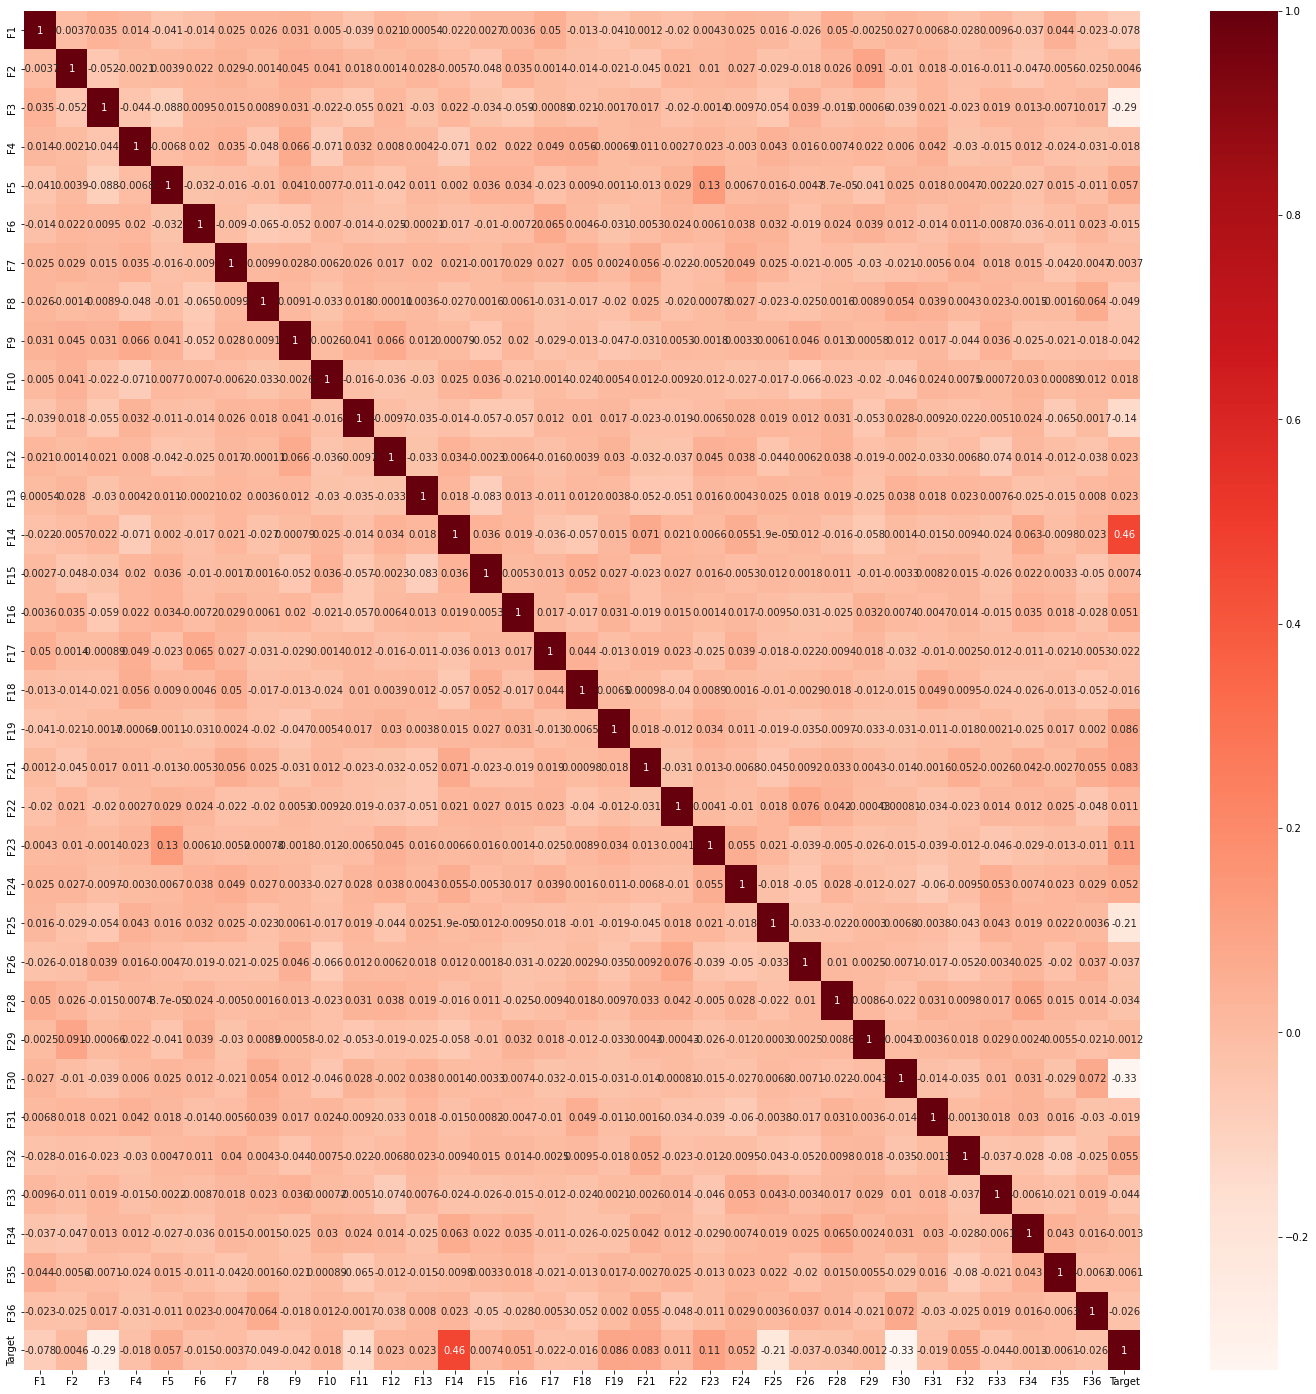

In [11]:
plt.figure(figsize=(25,25))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Outliers

In [80]:
#df.boxplot( figsize =(15, 10))

<div class="alert alert-warning">

# 2 - Pre-Processing<a class="anchor" id="pp"></a>

### 2.1 Ordinal encoding of categorical columns ie F20

**Analysis**
- F20 is ordinal data - high, low, medium, very high, very low.
- Convert all Ordinal data to numberic encoding

In [82]:
df["F20"]

0             Low
1        Very low
2            High
3       Very high
4            High
          ...    
1495       Medium
1496         High
1497         High
1498          Low
1499         High
Name: F20, Length: 1500, dtype: object

In [505]:
dict_f20 = {
"Very low":0,
"Low":1,
"Medium":2,
"High":3,
"Very high":4,
"High":5
}
df["F20"] = df.F20.map(dict_f20)
df["F20"]

0       1
1       0
2       5
3       4
4       5
       ..
1495    2
1496    5
1497    5
1498    1
1499    5
Name: F20, Length: 1500, dtype: int64

### 2.2 One Hot encoding of categorical columns ie F27

### **Analysis**
- F27 needs one hot encoding.
- Sklearns get_dummies is used for one hot encoding
- To avoid dummy variable trap, one column is deleted from one-hot encoded columns

In [506]:
# Apply one hot encoding and drop the original F27 column
dummy_F27 = pd.get_dummies(df[['F27']],drop_first=True)
print(dummy_F27)
df=df. join(dummy_F27) 
# drop F27 column
df = df.drop(['F27'], axis=1)

      F27_Rest  F27_UK  F27_USA
0            1       0        0
1            0       0        1
2            1       0        0
3            0       0        1
4            1       0        0
...        ...     ...      ...
1495         1       0        0
1496         0       0        1
1497         0       0        0
1498         1       0        0
1499         1       0        0

[1500 rows x 3 columns]


- Rearrange the column after inserting one-hot encoded columns such that Target column is at the end

In [507]:
column_to_move = df.pop("Target")
column_to_move
df.insert(38, "Target", column_to_move)
df.head(2)

F1                    F2                 F3  \
0  854.03999999999996 -15267.84000000000015 193.03999999999999   
1 1748.75999999999999  -4299.44999999999982 439.72000000000003   

                    F4                 F5                 F6  \
0 12132.20000000000073 464.22000000000003 -19.81000000000000   
1 18046.13999999999942 540.36000000000001  -8.55000000000000   

                   F7                F8                 F9               F10  \
0  920.41999999999996 11.84000000000000 -38.02000000000000  8.35000000000000   
1 1913.77999999999997 11.28000000000000 122.02000000000000 -8.83000000000000   

   ...                F31                 F32                F33  \
0  ... -46.22000000000000   91.89000000000000 -41.70000000000000   
1  ...  51.24000000000000 -450.33999999999997 -75.30000000000000   

                   F34               F35                 F36  F27_Rest  \
0  -849.77999999999997 -5.12000000000000 4261.68000000000029         1   
1 -1801.58999999999992 -0.16000000000000 2737.57999999999993         0   

   F27_UK  F27_USA             Target  
0       0        0 609.09000000000003  
1       0        1 232.66000000000000  

[2 rows x 39 columns]

In [599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   F1        1500 non-null   float64
 1   F2        1500 non-null   float64
 2   F3        1500 non-null   float64
 3   F4        1500 non-null   float64
 4   F5        1500 non-null   float64
 5   F6        1500 non-null   float64
 6   F7        1500 non-null   float64
 7   F8        1500 non-null   float64
 8   F9        1500 non-null   float64
 9   F10       1500 non-null   float64
 10  F11       1500 non-null   int64  
 11  F12       1500 non-null   float64
 12  F13       1500 non-null   float64
 13  F14       1500 non-null   float64
 14  F15       1500 non-null   float64
 15  F16       1500 non-null   float64
 16  F17       1500 non-null   float64
 17  F18       1500 non-null   float64
 18  F19       1500 non-null   float64
 19  F20       1500 non-null   int64  
 20  F21       1500 non-null   floa

- After feature pre-processing, plot the correlation of Independent and Dependent variable in descending order
- F14, F23 features have the most correlation (Correlation itself is not strong)

In [508]:
#Sort correlations
correlations = df.corr()['Target'].sort_values(ascending=False)
correlations

Target      1.00000000000000
F14         0.46355995024136
F20         0.29365436441825
F27_UK      0.29014863198797
F23         0.10641290496894
F19         0.08583683662725
F21         0.08251035103726
F5          0.05676210884208
F32         0.05476791414331
F24         0.05248141330390
F16         0.05051859002746
F13         0.02332099410453
F12         0.02283741581140
F10         0.01811137641815
F22         0.01075380854790
F15         0.00743952657817
F2          0.00457436615039
F29        -0.00118438105225
F34        -0.00131018516021
F7         -0.00370156387321
F35        -0.00614275883711
F6         -0.01509057563864
F18        -0.01565026937666
F4         -0.01798810684139
F31        -0.01944925037494
F17        -0.02169704409879
F36        -0.02566231204928
F28        -0.03352975422587
F26        -0.03687714052806
F9         -0.04172500915810
F33        -0.04362453516751
F8         -0.04889326256095
F1         -0.07804086647263
F27_USA    -0.09591250444937
F11        -0.

### - Correlation that are >.2
- F27_UK
- F14
- F20

In [509]:
corr[corr>=.2]

F1               F2               F3               F4  \
F1     1.00000000000000              NaN              NaN              NaN   
F2                  NaN 1.00000000000000              NaN              NaN   
F3                  NaN              NaN 1.00000000000000              NaN   
F4                  NaN              NaN              NaN 1.00000000000000   
F5                  NaN              NaN              NaN              NaN   
F6                  NaN              NaN              NaN              NaN   
F7                  NaN              NaN              NaN              NaN   
F8                  NaN              NaN              NaN              NaN   
F9                  NaN              NaN              NaN              NaN   
F10                 NaN              NaN              NaN              NaN   
F11                 NaN              NaN              NaN              NaN   
F12                 NaN              NaN              NaN              NaN   
F13                 NaN              NaN              NaN              NaN   
F14                 NaN              NaN              NaN              NaN   
F15                 NaN              NaN              NaN              NaN   
F16                 NaN              NaN              NaN              NaN   
F17                 NaN              NaN              NaN              NaN   
F18                 NaN              NaN              NaN              NaN   
F19                 NaN              NaN              NaN              NaN   
F21                 NaN              NaN              NaN              NaN   
F22                 NaN              NaN              NaN              NaN   
F23                 NaN              NaN              NaN              NaN   
F24                 NaN              NaN              NaN              NaN   
F25                 NaN              NaN              NaN              NaN   
F26                 NaN              NaN              NaN              NaN   
F28                 NaN              NaN              NaN              NaN   
F29                 NaN              NaN              NaN              NaN   
F30                 NaN              NaN              NaN              NaN   
F31                 NaN              NaN              NaN              NaN   
F32                 NaN              NaN              NaN              NaN   
F33                 NaN              NaN              NaN              NaN   
F34                 NaN              NaN              NaN              NaN   
F35                 NaN              NaN              NaN              NaN   
F36                 NaN              NaN              NaN              NaN   
Target              NaN              NaN              NaN              NaN   

                     F5               F6               F7               F8  \
F1                  NaN              NaN              NaN              NaN   
F2                  NaN              NaN              NaN              NaN   
F3                  NaN              NaN              NaN              NaN   
F4                  NaN              NaN              NaN              NaN   
F5     1.00000000000000              NaN              NaN              NaN   
F6                  NaN 1.00000000000000              NaN              NaN   
F7                  NaN              NaN 1.00000000000000              NaN   
F8                  NaN              NaN              NaN 1.00000000000000   
F9                  NaN              NaN              NaN              NaN   
F10                 NaN              NaN              NaN              NaN   
F11                 NaN              NaN              NaN              NaN   
F12                 NaN              NaN              NaN              NaN   
F13                 NaN              NaN              NaN              NaN   
F14                 NaN              NaN              NaN              NaN   
F15                 NaN              NaN  

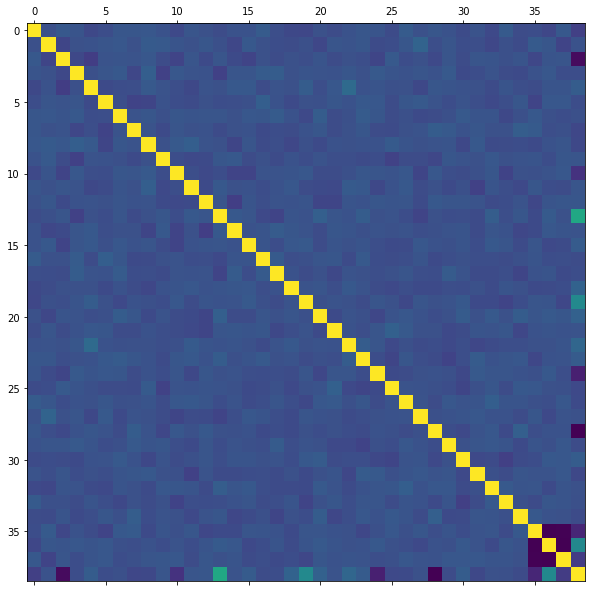

In [510]:
corr = df.corr() 

# Plot heatmap of correlation
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(),fignum=f.number)
plt.show()

### Train Test Split

- Split data - train and test for modelling and evaluation

In [515]:
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=34)

### Feature scaling

In [516]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [517]:
X_train.iloc[:, 0:38].head(2)

F1                    F2                  F3  \
651 1256.09999999999991  -9170.67000000000007  131.91000000000000   
413 1248.55999999999995 -24466.47000000000116 -135.06999999999999   

                      F4                 F5                 F6  \
651 23641.04000000000087 688.44000000000005  -8.69000000000000   
413 23937.77999999999884 620.27999999999997 -13.01000000000000   

                     F7                F8                 F9  \
651 1884.44000000000005  7.45000000000000 237.31999999999999   
413 2242.73999999999978 10.72000000000000 -76.90000000000001   

                   F10  ...  F30                F31                 F32  \
651 -29.34000000000000  ...    6 -39.66000000000000 -690.16999999999996   
413 -36.57000000000000  ...   10 -25.89000000000000 -385.69999999999999   

                   F33                  F34              F35  \
651 -59.61000000000000 -1235.70000000000005 8.98000000000000   
413 -52.35000000000000 -1306.25999999999999 8.74000000000000   

                    F36  F27_Rest  F27_UK  F27_USA  
651 2810.15999999999985         0       1        0  
413 3510.96000000000004         1       0        0  

[2 rows x 38 columns]

In [518]:
scaler = MinMaxScaler()

scaler=scaler.fit(X_train.iloc[:, 0:38]) 

# Scale train set features
X_train_sc=scaler.transform(X_train)
X_train_sc_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_train_sc_df

# Sclae test set features
X_test_sc=scaler.transform(X_test)
X_test_sc_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)
X_test_sc_df

F1               F2               F3               F4  \
414  0.60787884786697 0.59641331708667 0.48866119078363 0.27731650597193   
125  0.36179352667525 1.00140269725592 0.68537075132192 0.57722861861294   
1081 0.45268237157280 0.43426648143405 0.59137082005685 0.18001353309776   
1394 0.53873106997921 0.55459110417782 0.22685964817533 0.39927304969136   
247  0.57340888844898 0.55007360150670 0.46684275902023 0.33570015633061   
...               ...              ...              ...              ...   
283  0.42061268930021 0.38414450213561 0.49431218424890 0.72145410802108   
788  0.46989508066911 0.46662630872275 0.34296767985232 0.26175136951320   
626  0.21539146788083 0.58010612069612 0.31268503198629 0.42457942398780   
764  0.50902702167673 0.42338639368139 0.65036503159352 0.22071756528683   
962  0.58536573295061 0.45164833743380 0.57935693560028 0.22389084338162   

                   F5               F6               F7               F8  \
414  0.44706485516534 0.52675585284281 0.27794231835829 0.43515117264764   
125  0.37392976159959 0.65193502150024 0.33475873544093 0.53207120655552   
1081 0.33245321712381 0.46655518394649 0.58732113144759 0.48799095789771   
1394 0.38725967700590 0.43406593406593 0.60001663893511 0.18112461147217   
247  0.50853627275058 0.70090778786431 0.43724902939545 0.44362814354337   
...               ...              ...              ...              ...   
283  0.07569853883620 0.55590062111801 0.32929007210205 0.43825939530941   
788  0.45267880030761 0.26994744386049 0.49272323904603 0.49562023170387   
626  0.46477826198411 0.39417104634496 0.63819744869662 0.46623339926533   
764  0.37375032043066 0.48041089345437 0.39378813089296 0.51879061881888   
962  0.45893360676750 0.44911610129001 0.59585690515807 0.55015541113309   

                   F9              F10  ...              F30              F31  \
414  0.29910008512708 0.57291767671870  ... 0.45454545454545 0.59367519490502   
125  0.48881186914751 0.43372442548240  ... 0.18181818181818 0.39060063687274   
1081 0.33676881916575 0.62125472704354  ... 0.36363636363636 0.39270890523773   
1394 0.54782317888848 0.52816833123243  ... 0.45454545454545 0.60733501701987   
247  0.21154080019458 0.23872781925725  ... 0.09090909090909 0.54551443944219   
...               ...              ...  ...              ...              ...   
283  0.51109692326402 0.43648792785804  ... 0.18181818181818 0.60138355111453   
788  0.38842271677004 0.49326093280326  ... 0.27272727272727 0.77768749313715   
626  0.48653167943573 0.47178318626976  ... 0.36363636363636 0.27438234325244   
764  0.47473549799343 0.67269465722874  ... 0.45454545454545 0.55809816624575   
962  0.39945883497507 0.56671191699796  ... 0.18181818181818 0.37562314702976   

                  F32              F33              F34              F35  \
414  0.33649006412058 0.52030039896738 0.79828667015866 0.43750000000000   
125  0.29557805086134 0.40201830556207 0.42092605421602 0.37200000000000   
1081 0.53746886252576 0.26824689040131 0.38081318396612 0.59450000000000   
1394 0.42933657317887 0.38559023703356 0.80479754884567 0.80100000000000   
247  0.46383652795467 0.46538371274349 0.29638015421095 0.55800000000000   
...               ...              ...              ...              ...   
283  0.22410669978219 0.34780567941798 0.51662921221747 0.65150000000000   
788  0.58613010391788 0.27669561135884 0.31080434133676 0.89400000000000   
626  0.75041862943778 0.40600797934757 0.37695509408670 0.44250000000000   
764  0.39830299237544 0.56700305092701 0.48020546440701 0.63900000000000   
962  0.44633353949051 0.43745599624501 0.41535576094487 0.51650000000000   

                  F36         F27_Rest           F27_UK          F27_USA  
414  0.84875195341768 0.00000000000000 0.00000000000000 0.00000000000000  
125  0.73281527626143 0.00000000000000 1.00000000000000 0.00000000000000  
1081 0.76980176824439 0.00000000000000 0.00000000000000 0.00000000000000  
1394 0.

In [577]:
X_train_sc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1125 entries, 651 to 1441
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   F1        1125 non-null   float64
 1   F2        1125 non-null   float64
 2   F3        1125 non-null   float64
 3   F4        1125 non-null   float64
 4   F5        1125 non-null   float64
 5   F6        1125 non-null   float64
 6   F7        1125 non-null   float64
 7   F8        1125 non-null   float64
 8   F9        1125 non-null   float64
 9   F10       1125 non-null   float64
 10  F11       1125 non-null   float64
 11  F12       1125 non-null   float64
 12  F13       1125 non-null   float64
 13  F14       1125 non-null   float64
 14  F15       1125 non-null   float64
 15  F16       1125 non-null   float64
 16  F17       1125 non-null   float64
 17  F18       1125 non-null   float64
 18  F19       1125 non-null   float64
 19  F20       1125 non-null   float64
 20  F21       1125 non-null   fl

<div class="alert alert-warning">

# 3. PCA - for dimentionality reduction<a class="anchor" id="pca"></a>

**Analysis**

- Applied PCA
- First 5 Principal Components accounts to 96% of variance
- Hence selected first 5 Principal components for modelling Linear Regression
- But the accuracy from training the Linear Regression model with 5 principal components was very low.
- Hence, PCA approach was not considered for modelling


In [519]:
pd.set_option('display.float_format', '{:.14f}'.format)
pd.options.display.float_format = '{:.14f}'.format  
np.set_printoptions(suppress=True)

In [520]:
cov_matrix = np.cov(X_train)
cov_matrix

array([[4.70846490e+07, 5.10593946e+07, 5.20111464e+07, ...,
        4.69395060e+07, 6.92990980e+07, 5.55263712e+07],
       [5.10593946e+07, 6.45265797e+07, 5.49167257e+07, ...,
        4.44407129e+07, 7.53272785e+07, 6.82134450e+07],
       [5.20111464e+07, 5.49167257e+07, 6.03334170e+07, ...,
        5.03013798e+07, 7.36385324e+07, 5.66064835e+07],
       ...,
       [4.69395060e+07, 4.44407129e+07, 5.03013798e+07, ...,
        5.67566383e+07, 6.98728079e+07, 5.42469437e+07],
       [6.92990980e+07, 7.53272785e+07, 7.36385324e+07, ...,
        6.98728079e+07, 1.08182591e+08, 8.54220033e+07],
       [5.55263712e+07, 6.82134450e+07, 5.66064835e+07, ...,
        5.42469437e+07, 8.54220033e+07, 7.77887829e+07]])

In [521]:
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
  
pca = PCA(n_components =20)
X_centered = X_train - np.mean(X_train, axis=0)
X1_centered = X_test - np.mean(X_test, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / len(X_test)
 
X_train_projected = pca.fit_transform(X_centered)
#X_test_projected = pca.transform(X1_centered)
 
explained_variance = pca.explained_variance_ratio_
print("var:", explained_variance*100)
#print("comp:", pca.components_)
(pca.components_).shape

var: [27.19850999 25.20188545 24.25331581 11.01891396 10.6508956   0.81606375
  0.26796514  0.20968281  0.1132339   0.11079159  0.05847719  0.02831383
  0.02725956  0.02489283  0.00514676  0.00507924  0.00243952  0.00217327
  0.00200409  0.00114461]


(20, 38)

In [522]:
X_train_projected.shape

(1125, 20)

In [523]:
X_train_projected[:, 0:5].shape

(1125, 5)

In [524]:
lr_mdl =LinearRegression()

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lr_mdl, X_train_projected[:, 0:5], y_train, scoring='r2', cv=folds)
scores.mean()

0.027589968682766287

<div class="alert alert-warning">

# 4. Util Methods<a class="anchor" id="util"></a>

- Utial method to print R_Squared and RMSE. These methods are used in modelling

In [525]:
# Function to print model score, Classification Report & confusion matrix 
def print_model_metrics(mdl, X, y, title):
    p=mdl.predict(X)
    print("Model score accuracy--", mdl.score(X, y))

def print_r_squared(mdl, X, y_true, title):    
    y_pred=mdl.predict(X)    
    print(title ,": R_Squared --- ", r2_score(y_true, y_pred))
    Adj_r2 = 1 - (1-r2_score(y_true, y_pred)) * (len(X)-1)/(len(X)-X.shape[1]-1)
    print(title ,": Adjusted R_Squared --- ", Adj_r2)
    #print(title ,": Accuracy_scoring --- ", model.score(X_test_sc_df, y_test))
    print(title ,": RMSE --- ",np.sqrt(mean_squared_error(y_true, y_pred)))


<div class="alert alert-warning">

# 5 - Modelling<a class="anchor" id="modelling"></a>

<div class="alert alert-info">

## 5.1 Algorithm 1 - Linear Regression<a class="anchor" id="LR"></a>

- LinearRegression fits a linear model with coefficients w = (w1, .... , wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
- Linear regression is a parametric algorithm which has a strict assumption on the data. 

### Approach 1 -  Linear Regression - Directly fit Linear model without feature selection

####  5.1.1 Linear Regression -  KFold Cross Validation

In [526]:
lr_mdl =LinearRegression()

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lr_mdl, X_train_sc_df, y_train, scoring='r2', cv=folds)
scores.mean()

0.6354811538612759

####  5.1.2 Linear Regression -  fit model and get the coefficients

In [527]:
model =LinearRegression()
model.fit(X_train_sc_df, y_train)
coeff = model.coef_
coeff

array([  -58.35368618,  -152.3533407 , -2871.82266635,    70.91423079,
         -54.82588053,  -146.52836099,   -14.5891935 ,   -15.56723595,
        -222.43913281,   -27.61260152,  -975.02147569,    -9.09442691,
          25.47286224,  3390.12427608,  -420.90889211,   132.4286194 ,
        -133.09068497,   -23.2998222 ,   494.79856417,   955.81955712,
         309.75446479,  -173.31748022,  3703.59012171,   -15.41869616,
       -1633.50124541,  -230.58751775,  -322.54166857,    94.93146273,
       -2626.97455576,  -149.75930622,  -102.70965813,   164.22996071,
         107.56561319,  -121.53769813,  -140.36530172,  -409.58083061,
         666.59305752,   -91.67681344])

#### 5.1.3 LinearRegression - Evaluate Train set - R_squared and Residual Plot

**Analysis**
- The residuals are not randomly distributed, the data assumption is violated in some way, hence needs further analysis on how to handle/transform/preprocess data so that model does not show any pattern in the residual plot.

Trainset - LinearRegression : R_Squared ---  0.699944913350632
Trainset - LinearRegression : Adjusted R_Squared ---  0.689445748256087
Trainset - LinearRegression : RMSE ---  674.3368733747325


Text(0.5, 1.0, 'Residual Plot')

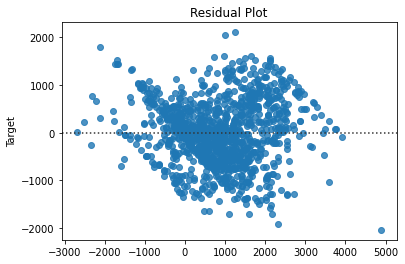

In [528]:
print_r_squared(model,X_train_sc_df, y_train, "Trainset - LinearRegression")
pred=model.predict(X_train_sc_df)
sns.residplot(x=pred, y=y_train).set_title('Residual Plot') 

#### 5.1.4 LinearRegression - Evaluate Test set - R_squared and Residual Plot

Testset - LinearRegression : R_Squared ---  0.6766874576546356
Testset - LinearRegression : Adjusted R_Squared ---  0.6401223486989098
Testset - LinearRegression : RMSE ---  680.0749583084405


Text(0.5, 1.0, 'Residual Plot')

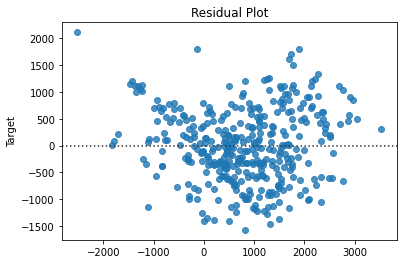

In [529]:
#Evaluate Test set - LinearRegression
print_r_squared(model,X_test_sc_df, y_test, "Testset - LinearRegression")
pred=model.predict(X_test_sc_df)
sns.residplot(x=pred, y=y_test).set_title('Residual Plot') 

## Linear Regression with Feature selection - using Recursive Feature Elimination(RFE)

#### Approach 2 -  Linear Regression  - Fit the LR model only with top 13 important features

**Analysis** 
- Feature selection using REF(Recursive Feature Elimination) did not result in any improvemnt in scoring Linear regression model
- Hence, we dont use feature selection in modelling, always apply modelling on whole pre-processed dataset

#### 5.1.5 Feature selection using REF - Recursive Feature Elimination

In [530]:

lm = LinearRegression()
lm.fit(X_train_sc_df, y_train)

rfe = RFE(lm, 13)
rfe = rfe.fit(X_train_sc_df, y_train)
rfeCols = X_train_sc_df.columns[rfe.support_]
X_train_rfe = X_train_sc_df[rfeCols]
X_test_rfe = X_train_sc_df[rfeCols]
print("Selected features by RFE are",list(rfeCols))
X_train_selected = X_train_sc_df[list(rfeCols)]
X_test_selected = X_test_sc_df[list(rfeCols)]
#X_train_selected

Selected features by RFE are ['F3', 'F11', 'F14', 'F15', 'F19', 'F20', 'F21', 'F23', 'F25', 'F28', 'F30', 'F27_Rest', 'F27_UK']


#### 5.1.6 LinearRegression - Fit model with selected features only

In [531]:
selected_model =LinearRegression()
selected_model.fit(X_train_selected, y_train)
coeff = selected_model.coef_
coeff

array([-2897.66899809,  -988.6701344 ,  3369.18772602,  -407.04916839,
         527.7968695 ,   963.69103874,   312.73215582,  3664.07638679,
       -1618.89261172,  -360.97761688, -2621.16964015,  -366.22239549,
         703.75534366])

#### 5.1.7 LinearRegression - Evaluate Train set - R_squared and Residual Plot

Trainset - LinearRegression : R_Squared ---  0.6955949377557182
Trainset - LinearRegression : Adjusted R_Squared ---  0.6920330423379184
Trainset - LinearRegression : RMSE ---  679.2073022818633


Text(0.5, 1.0, 'Residual Plot')

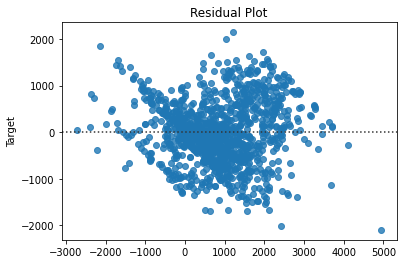

In [532]:
print_r_squared(selected_model,X_train_selected, y_train, "Trainset - LinearRegression")
pred=selected_model.predict(X_train_selected)
sns.residplot(x=pred, y=y_train).set_title('Residual Plot') 

#### 3.1.4 LinearRegression - Evaluate Test set - R_squared and Residual Plot

Testset - LinearRegression : R_Squared ---  0.6771914901610823
Testset - LinearRegression : Adjusted R_Squared ---  0.6655668069812875
Testset - LinearRegression : RMSE ---  679.5446454679551


Text(0.5, 1.0, 'Residual Plot')

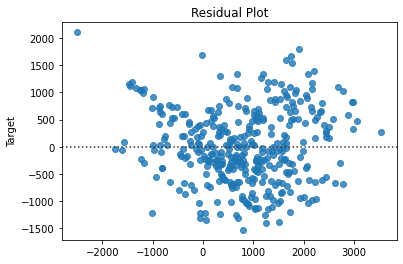

In [533]:
#Evaluate Test set - LinearRegression
print_r_squared(selected_model,X_test_selected, y_test, "Testset - LinearRegression")
pred=selected_model.predict(X_test_selected)
sns.residplot(x=pred, y=y_test).set_title('Residual Plot') 

### Extra - Linear Regression with non-sklearn package - stats_model.OLS (Ordinary Least Squares) 

**Analysis:** 
  - OLS is a non sklearn package for statistical modelling
  - OLS returns statistical analysis after fitting
  - The significant features have p-value close to 0. The top 10 significant feature returned by Sklearns LinearRegression matches with the StatsModel's OLS.

In [534]:
import statsmodels.api as sm
X = sm.add_constant(X_train_sc_df)
mod = sm.OLS( y_train,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     66.67
Date:                Thu, 03 Mar 2022   Prob (F-statistic):          7.81e-254
Time:                        18:08:44   Log-Likelihood:                -8924.3
No. Observations:                1125   AIC:                         1.793e+04
Df Residuals:                    1086   BIC:                         1.812e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1786.9839    455.454      3.924      0.0

<div class="alert alert-info">

## 3.2 Algorithm 2 - Stochastic Gradient Descent (SGD)<a class="anchor" id="sgd"></a>

- In SGD, the gradient of the loss is estimated each sample at a time and the model is updated in each iteration with the learning rate.
- The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using L2 norm. - 

#### 3.2.1 SGD - Train Model with KFold Cross Validation

In [535]:
sgd_mdl =SGDRegressor(max_iter=1000,loss='squared_loss',learning_rate='adaptive',alpha=0.0001)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(sgd_mdl, X_train_sc_df, y_train, scoring='r2', cv=folds)
scores.mean()

0.669165137527537

#### 3.2.2 SGD - Evaluate Train set - R_squared 

In [536]:
sgd_final = SGDRegressor(max_iter=1000,loss='squared_loss',learning_rate='adaptive',alpha=0.0001)
sgd_final.fit(X_train_sc_df, y_train)

SGDRegressor(learning_rate='adaptive')

#### 3.2.3 SGD - Evaluate Train set 

The accuracy from SGD is 69% both for Train and test set, which is not a good accuracy. The model needs better tuning and data might need further preprocessing too.

In [537]:
print_r_squared(sgd_final,X_train_sc_df, y_train, "Trainset - SGD")

Trainset - SGD : R_Squared ---  0.6928971254350322
Trainset - SGD : Adjusted R_Squared ---  0.6821513526601991
Trainset - SGD : RMSE ---  682.210425520592


#### 3.2.4 SGD - Evaluate Test set 

In [538]:
print_r_squared(sgd_final,X_test_sc_df, y_test, "Testset - SGD")

Testset - SGD : R_Squared ---  0.6768592186100721
Testset - SGD : Adjusted R_Squared ---  0.6403135350004969
Testset - SGD : RMSE ---  679.8942881713356


<div class="alert alert-info">
    
## 5.3 Algorithm 3 - Multi Layer Perceptron (MLP)<a class="anchor" id="mlp"></a>

**Analysis**
- Multi Layer Perceptron (MLP) is a Neural network based architecture for prediction. This model optimizes the squared error using adam optimizer.
- As a 3rd Algorithm, I used MLPRegressor which is a Sklearn based Neural Network based regression algorithm.
- The prediction of MLP was better than other algortihms.
- Train accuracy = 78%, Test accuracy = 77%, Adjusted R_squared = 77%. Though this is not the best accuracy, without overfitting MLP, I could get these accuracy.
- Hence, I choose best model as MLP.

#### 5.3.1 MLP - Grid search with Cross Validation

In [539]:
mlp_grid_params = {
    "hidden_layer_sizes"          : [  [200,100,50,10]], #[100, 10], [150,100,10]
    "alpha"  : [0.0001, 0.001], 
    "activation"       : ["relu", "tanh"],
    'solver' : ['adam', 'lbfgs'],
    'batch_size': [64],
    "learning_rate": ['adaptive'],
    "learning_rate_init": [0.001],
    "max_iter": [2000]
}

cv=StratifiedKFold(n_splits=5, random_state=98, shuffle=True)
clfmlr=MLPRegressor()

clf_mlp_grid_mdl = GridSearchCV(cv=5,estimator=clfmlr, param_grid=mlp_grid_params, scoring='r2' ,n_jobs=-1,verbose=4)
clf_mlp_grid_mdl.fit(X_train_sc_df, y_train)
best_scores_mlp_grid = clf_mlp_grid_mdl.best_score_
best_params_mlp_grid = clf_mlp_grid_mdl.best_params_  
print(best_scores_mlp_grid)
print(best_params_mlp_grid)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.7139889271071367
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 64, 'hidden_layer_sizes': [200, 100, 50, 10], 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 2000, 'solver': 'adam'}


#### 3.3.2 MLP - Fit final model with best hyper parameters

In [543]:
final_mlp = MLPRegressor(activation='relu', alpha=0.0001,batch_size=64, hidden_layer_sizes=[200, 100, 50, 10], learning_rate='adaptive',learning_rate_init=0.001,max_iter=2000, solver = 'adam'  )
final_mlp.fit(X_train_sc_df, y_train)

MLPRegressor(batch_size=64, hidden_layer_sizes=[200, 100, 50, 10],
             learning_rate='adaptive', max_iter=2000)

#### 3.2.3 MLP - Evaluate Train set 

Both train and test accuracy is better than those of previous algorithms, but not the best. Further data tuning might result in better score.

In [544]:
print_r_squared(final_mlp,X_train_sc_df, y_train, "Trainset - MLP")

Trainset - MLP : R_Squared ---  0.7867765224804018
Trainset - MLP : Adjusted R_Squared ---  0.7793156641509867
Trainset - MLP : RMSE ---  568.4521615822478


#### 3.2.4 MLP - Evaluate Test set 

In [545]:
print_r_squared(final_mlp,X_test_sc_df, y_test, "Testset - MLP")

Testset - MLP : R_Squared ---  0.7709465288257586
Testset - MLP : Adjusted R_Squared ---  0.7450416719667671
Testset - MLP : RMSE ---  572.4188753661596


# Final Best Model Conclusion:<a class="anchor" id="conclusion"></a>

<div class="alert alert-success">
    
**EDA & Preprocessing**
   - In Part A, basic EDA was carried out like data summary, correlation analysis
   - As part of preprocessing, one-hot encoding of categorical columns and feature scaling was applied
    
**Modelling**
- In Part A, the Regression use-case was modelled with 3 Algorithms - Linear Regression, Stochastic Gradient Descent(SGD), Multi Layer Perceptron(MLP)
- MLP resulted in better accuracy than Linear Regression and MLP. MLP Train accuracy = 78% , Test accuracy = 77%
- **Best Model = Multi Layer Perceptron - Algorithm 3**
- So, in Part B, the test dataset is evaluated(predicted) and the results are written to excel named "P2_Test_Predictions.csv"
    
**Future scope**
- I think, with futher knowledge of the data (How the data was generated, what each colum nmeans, how they are functionally related to each other ..) we can do the feature enginnering better and get better accuracy than the current models.
- Also there were outliers in the data, that I did not handle, because the outlier count in each column was high. Instead of capping the outliers or removing the outliers, I retained the data as it is, without any outlier treatment. 
- Linear Regression is sensitive to outliers and hence resulted in not good accuracy. With proper data understing and outlier treatment, Linear Regression or Generalized Linear Regression might possibly lead to acceptable model.

# Part B<a class="anchor" id="partb"></a>

In [624]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

- Test set statistics look similar to Train set

In [625]:
test_df.describe()

F1                    F2                   F3  \
count  1500.00000000000000   1500.00000000000000  1500.00000000000000   
mean    841.23742666666692 -11731.84814000000006  -240.44804666666678   
std     597.14308767755608   8910.49610957460573   310.22218458236631   
min   -1038.20000000000005 -39362.19000000000233 -1274.02999999999997   
25%     436.65499999999997 -17736.97499999999854  -446.57499999999999   
50%     850.64999999999998 -12013.43999999999869  -235.87500000000000   
75%    1222.93499999999995  -5664.67500000000018   -32.09250000000000   
max    2835.11999999999989  19889.45999999999913   931.38000000000000   

                        F4                  F5                  F6  \
count  1500.00000000000000 1500.00000000000000 1500.00000000000000   
mean  24555.38702666667086  569.98378000000116  -13.90543333333335   
std    5934.25737377572659  130.70835499011179    4.29078168681164   
min    3725.55999999999995  -61.20000000000000  -30.88000000000000   
25%   20513.15999999999985  506.71500000000003  -15.88250000000000   
50%   24592.15000000000146  570.28499999999997  -13.86500000000000   
75%   28599.56499999999869  634.18499999999995  -11.67000000000000   
max   43217.62000000000262 1226.25000000000000    6.70000000000000   

                       F7                  F8                  F9  \
count 1500.00000000000000 1500.00000000000000 1500.00000000000000   
mean  1686.89921333333223   10.20847333333333  -16.30795999999997   
std    609.69282954543087    4.25414429684997   83.89158522851487   
min   -477.42000000000002   -6.85000000000000 -389.56000000000000   
25%   1286.42499999999995    8.09750000000000  -58.24000000000000   
50%   1688.88999999999987   10.17500000000000  -17.91000000000000   
75%   2126.59499999999980   12.21000000000000   24.51000000000000   
max   3654.63999999999987   37.40000000000000  473.10000000000002   

                      F10  ...                 F28                   F29  \
count 1500.00000000000000  ... 1500.00000000000000   1500.00000000000000   
mean   -54.30858666666666  ... -115.63070666666682   7601.80442666666204   
std     29.38872669193985  ...   41.58648964404868   6034.61083874478754   
min   -162.66999999999999  ... -298.51999999999998 -11996.70000000000073   
25%    -73.35250000000001  ... -136.39500000000001   3518.47499999999991   
50%    -53.88000000000000  ... -114.62000000000000   7479.38000000000011   
75%    -35.41249999999999  ...  -94.14500000000001  11713.26499999999942   
max     60.69000000000000  ...   99.16000000000000  28864.06000000000131   

                      F30                 F31                  F32  \
count 1500.00000000000000 1500.00000000000000  1500.00000000000000   
mean     7.95466666666667  -13.64378666666669  -389.47991333333255   
std      3.48645691355791   44.17915501855207   409.85695331848973   
min      0.00000000000000 -251.19999999999999 -2389.44999999999982   
25%      6.00000000000000  -34.90750000000000  -606.96000000000004   
50%      8.00000000000000  -14.56000000000000  -381.82499999999999   
75%     10.00000000000000    6.81250000000000  -176.06250000000000   
max     20.00000000000000  263.75999999999999  1692.53999999999996   

                      F33                  F34                 F35  \
count 1500.00000000000000  1500.00000000000000 1500.00000000000000   
mean   -58.64012000000008 -1677.27472000000057    5.68676000000001   
std     13.17284897883064   888.17832866968104    6.15919819327072   
min   -120.15000000000001 -4940.01000000000022  -14.74000000000000   
25%    -65.13749999999999 -2248.61250000000018    1.55000000000000   
50%    -58.77000000000000 -1663.23000000000002    5.62000000000000   
75%    -52.05000000000000 -1091.67000000000007    9.82000000000000   
max      6.15000000000000  1110.69000000000005   24.14000000000000   

                      F36           Target  
count 1500.00000000000000 0.00000000000000  
mean  3606.08834666666326              NaN  
std    839.06313887530484      

### Apply ordinal encoding on column F20  

In [626]:
dict_f20 = {"Very low":0,"Low":1,"Medium":2,"High":3,"Very high":4,"High":5}
test_data["F20"] = test_data.F20.map(dict_f20)


### Apply one hot encoding on column F27

In [627]:
dummy_F27 = pd.get_dummies(test_data[['F27']],drop_first=True)
test_data = test_data.join(dummy_F27)
test_data = test_data.drop(['F27'], axis=1)
test_data

F1                    F2                  F3  \
0    1209.09999999999991  -6727.56000000000040 -417.86000000000001   
1    1027.20000000000005   1509.39000000000010 -152.59000000000000   
2    1146.03999999999996    367.25999999999999  -93.47000000000000   
3     452.63999999999999 -14607.60000000000036   73.16000000000000   
4     861.74000000000001 -16186.68000000000029 -781.52999999999997   
...                  ...                   ...                 ...   
1495 1001.13999999999999  -2342.88000000000011   32.18000000000000   
1496  997.58000000000004  -7178.81999999999971 -621.48000000000002   
1497  796.91999999999996 -34710.05999999999767 -161.06000000000000   
1498 -122.68000000000001 -30784.79999999999927 -377.57999999999998   
1499  685.03999999999996 -26168.04000000000087   30.00000000000000   

                       F4                  F5                 F6  \
0    29985.68000000000029  483.00000000000000 -12.62000000000000   
1    23458.59999999999854  575.37000000000000 -17.69000000000000   
2    18350.24000000000160  511.86000000000001 -18.92000000000000   
3    23934.93999999999869  671.03999999999996 -14.73000000000000   
4    26840.00000000000000  556.98000000000002 -11.88000000000000   
...                   ...                 ...                ...   
1495 29789.79999999999927  536.97000000000003 -14.78000000000000   
1496 23500.68000000000029  401.94000000000000  -5.30000000000000   
1497 34887.90000000000146 1027.95000000000005 -15.11000000000000   
1498 18080.04000000000087  452.39999999999998 -13.53000000000000   
1499 32428.70000000000073  576.84000000000003 -14.53000000000000   

                      F7                F8                 F9  \
0     599.55999999999995 14.63000000000000  35.44000000000000   
1    1801.35999999999990  7.33000000000000  52.02000000000000   
2    1621.66000000000008 10.80000000000000  29.78000000000000   
3    2311.61999999999989  9.61000000000000 -24.52000000000000   
4    1207.46000000000004 10.89000000000000  13.58000000000000   
...                  ...               ...                ...   
1495  737.75999999999999 12.54000000000000  26.76000000000000   
1496 1778.77999999999997  7.25000000000000  -9.60000000000000   
1497 3654.63999999999987 10.60000000000000 -23.58000000000000   
1498 2480.44000000000005 11.20000000000000  -1.80000000000000   
1499 1417.88000000000011 12.70000000000000  48.06000000000000   

                     F10  ...  F30                 F31                 F32  \
0     -47.63000000000000  ...   14   -2.26000000000000 -865.91999999999996   
1    -106.12000000000000  ...   12  -71.25000000000000 -111.20000000000000   
2     -52.25000000000000  ...   10  -31.63000000000000 -270.24000000000001   
3     -93.09999999999999  ...   12    5.77000000000000    5.01000000000000   
4     -53.09000000000000  ...    6   -6.67000000000000 -110.19000000000000   
...                  ...  ...  ...                 ...                 ...   
1495  -38.02000000000000  ...   14  -22.38000000000000 -498.89999999999998   
1496  -64.93000000000001  ...   10  -30.15000000000000 -191.69000000000000   
1497  -77.70000000000000  ...    8  -11.38000000000000  288.10000000000002   
1498 -106.34999999999999  ...    8 -136.06999999999999 -808.76999999999998   
1499  -73.48000000000000  ...   10  -19.56000000000000 -281.11000000000001   

                    F33                  F34               F35  \
0    -70.83000000000000 -3121.86000000000013  0.06000000000000   
1    -58.05000000000000  -870.38999999999999  6.68000000000000   
2    -64.47000000000000 -2605.53000000000020  6.78000000000000   
3    -58.74000000000000 -1270.79999999999995  6.04000000000000   
4    -42.33000000000000  -941.19000000000005  6.92000000000000   
...                 ...                  ...               ...   
1495 -66.69000000000000 -1236.69000000000005  7.12000000000000   
1496 -47.19000000000000  -506.79000000000002 -2.44000000000000   
1497 -57.24000000000000 -1439.67000000000007 14.1600

In [628]:
test_data.head(2)

F1                   F2                  F3  \
0 1209.09999999999991 -6727.56000000000040 -417.86000000000001   
1 1027.20000000000005  1509.39000000000010 -152.59000000000000   

                    F4                 F5                 F6  \
0 29985.68000000000029 483.00000000000000 -12.62000000000000   
1 23458.59999999999854 575.37000000000000 -17.69000000000000   

                   F7                F8                F9                 F10  \
0  599.55999999999995 14.63000000000000 35.44000000000000  -47.63000000000000   
1 1801.35999999999990  7.33000000000000 52.02000000000000 -106.12000000000000   

   ...  F30                F31                 F32                F33  \
0  ...   14  -2.26000000000000 -865.91999999999996 -70.83000000000000   
1  ...   12 -71.25000000000000 -111.20000000000000 -58.05000000000000   

                   F34              F35                 F36  F27_Rest  F27_UK  \
0 -3121.86000000000013 0.06000000000000 2486.17999999999984         1       0   
1  -870.38999999999999 6.68000000000000 2835.51999999999998         0       1   

   F27_USA  
0        0  
1        0  

[2 rows x 38 columns]

### Scale test set

In [629]:
X_test_scaled=scaler.transform(test_data)
#X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

### Predict with best model built in PART A

In [630]:
best_mdl = final_mlp

In [631]:
predicted = best_mdl.predict (X_test_scaled)  # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

### Write predictions to CSV 

In [634]:
# Save to the destination file
test_df.to_csv('P2_Test_Predictions.csv', index=False, float_format='%.8g')

In [635]:
# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('P2_Test_Predictions.csv').iloc[:,:-1])

# Miscellaneous<a class="anchor" id="misc"></a>

# Extra Algorithm Tried - did not result in better accuracy

1. Lasso
2. RandomForestRegressor

# Extra Algorithm - Lasso

In [428]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train_sc_df, y_train)

Lasso(alpha=0.1)

#### Lasso - Gridsearch with Cross validation

In [433]:
lasso_grid_params = {
    "alpha" : [0.8,1.0],
    "selection" : ['cyclic', 'random']
}
las_mdl = linear_model.Lasso()
clf_las_grid_mdl = GridSearchCV(cv=5,estimator=las_mdl, param_grid=lasso_grid_params, scoring='r2' ,n_jobs=-1,verbose=4)
clf_las_grid_mdl.fit(X_train_sc_df, y_train)
best_scores_las_grid = clf_las_grid_mdl.best_score_
best_params_las_grid = clf_las_grid_mdl.best_params_  
print(best_scores_las_grid)
print(best_params_las_grid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.6561950462866616
{'alpha': 1.0, 'selection': 'random'}


#### Lasso - Fit best hyper parameters to final model

In [434]:
las_final_mdl = linear_model.Lasso(alpha=0.5, selection='random',normalize=True)
las_final_mdl.fit(X_train_sc_df, y_train)
print(las_final_mdl.coef_)

[   -0.           -53.43644075 -3038.31282988     0.
    -0.            -0.            -0.            -0.
   -86.17493064    -0.          -888.24207335    -0.
     0.          3315.25835946  -273.21145424     0.
    -0.            -0.           401.03537506   914.26063181
   184.25134656   -77.26096251  3207.20529991     0.
 -1730.25001632  -128.31348824  -215.61170305     0.
 -2520.37335321    -0.            -0.             0.
     0.            -0.            -0.81998836  -347.49261959
   660.72081707   -39.85683156]


#### 3.2.3 Lasso - Evaluate Train set 

In [435]:
print_r_squared(las_final_mdl,X_train_sc_df, y_train, "Trainset - Lasso")

Trainset - Lasso : R_Squared ---  0.6950501510058396
Trainset - Lasso : Adjusted R_Squared ---  0.6843797143007031
Trainset - Lasso : RMSE ---  679.8148114482328


#### 3.2.4 MLP - Evaluate Test set 

In [436]:
print_r_squared(las_final_mdl,X_test_sc_df, y_test, "Testset - Lasso")

Testset - Lasso : R_Squared ---  0.6777816791357179
Testset - Lasso : Adjusted R_Squared ---  0.641340321418924
Testset - Lasso : RMSE ---  678.9231574543372


# RandomForestRegressor

In [256]:
from sklearn.ensemble import RandomForestRegressor

In [259]:
df = pd.read_csv('P2_Data.csv')
dict_f20 = {"Very low":0,"Low":1,"Medium":2,"High":3,"Very high":4,"High":5}
df["F20"] = df.F20.map(dict_f20)
dummy_F27 = pd.get_dummies(df[['F27']],drop_first=True)
# print(dummy_F27)
df=df.join(dummy_F27) 
# # drop F27 column
df = df.drop(['F27'], axis=1)
column_to_move = df.pop("Target")
df.insert(38, "Target", column_to_move)
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=34)

In [264]:
param_grid = { 
    "max_depth"          : [60,80,90],  
     'max_leaf_nodes': [1,5,10,30,50],
     'min_samples_leaf'   : [1,5,10,30],
    "min_samples_split"  : [ 1,10,30,50],    
    'warm_start': [True]
       
            }
cv=StratifiedKFold(n_splits=5, random_state=98, shuffle=True)
clfmlr=RandomForestRegressor()

clf_mlp_grid_mdl = GridSearchCV(cv=5,estimator=clfmlr, param_grid=param_grid, scoring='r2' ,n_jobs=-1,verbose=3)
clf_mlp_grid_mdl.fit(X_train, y_train)
best_scores_mlp_grid = clf_mlp_grid_mdl.best_score_
best_params_mlp_grid = clf_mlp_grid_mdl.best_params_  
print(best_scores_mlp_grid)
print(best_params_mlp_grid)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


F:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan 0.38884937
 0.38527621 0.38650628        nan 0.38538734 0.38343164 0.38647135
        nan 0.38244525 0.38496631 0.38656739        nan 0.38569288
 0.38712336 0.38725284        nan 0.50305052 0.50329699 0.50989157
        nan 0.50165661 0.51026658 0.50996433        nan 0.50655137
 0.50483059 0.5109641         nan 0.50080797 0.50437302 0.49938132
        nan 0.61049872 0.621863   0.58914265        nan 0.61653393
 0.61769238 0.58921186        nan 0.62301716 0.61856759 0.58393018
        nan 0.53472633 0.53800913 0.53528811        nan 0.63621133
 0.62888502 0.58298666        nan 0.64147815 0.62120765 0.59003107
        nan 0.63738119 0.62349268 0.58293989        nan 0.53995434

0.6455560761698175
{'max_depth': 90, 'max_leaf_nodes': 50, 'min_samples_leaf': 5, 'min_samples_split': 10, 'warm_start': True}
